In [1]:
import pImpactR as impact
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [2]:
kx = 1.0
betx = 1.0
ke = 100.0e6
mass = impact.util.Me

In [3]:
const_focusing = impact.getElem('const_focusing')
loop = impact.getElem('loop')
const_focusing.length   = np.pi*2
const_focusing.n_sckick = ceil(const_focusing.length*20)
const_focusing.kx2 = kx**2
const_focusing.ky2 = kx**2
const_focusing.kz2 = 0.0
lattice = [loop, const_focusing]

In [4]:
beam = impact.getBeam()
beam.nCore_y = 1
beam.nCore_z = 1
beam.n_particles = 1
beam.kinetic_energy = 100.0e6
beam.mass = mass
beam.frequency = 1.0
beam.distribution.distribution_type = 'Waterbag'
beam.distribution.betx = betx
beam.distribution.emitx = 0.0
beam.distribution.emity = 0.0
beam.distribution.emitz = 0.0
beam.distribution.offsetx = 0.001

In [5]:
impact.writeInputFile(beam,lattice)
impact.run(beam)

input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles


0

In [6]:
X = impact.readRMS('x')

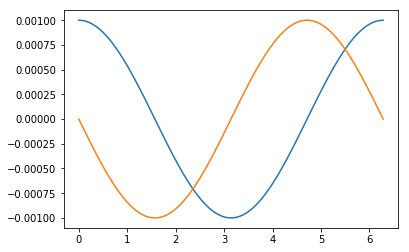

In [9]:
plt.plot(X.s,X.centroid_x)
plt.plot(X.s,X.centroid_px)